
# Module 18: Random Forest Algorithm  
## Training & Prediction Workflow, Implementation, Evaluation, and Hyperparameter Tuning


By the end of this notebook, you will be able to:
- Understand Traning and Prediction workflow of Random Forest
- Implement Random Forest properly
- Evaluate models beyond raw accuracy
- Understand feature importance
- Tune hyperparameters with intention



## 1. Why Random Forest Here?

Random Forest is one of the strongest baseline models for tabular data.

Why?
- It handles non-linear relationships
- It is resistant to overfitting compared to a single decision tree
- It requires minimal preprocessing
- It works well even when feature interactions are complex

We will now implement it step by step.


In [4]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Dataset Selection

We use the **Breast Cancer Wisconsin dataset** from sklearn.

Why this dataset?
- Clean and well-structured
- Binary classification
- Medical context encourages careful evaluation
- Non-linear patterns suit Random Forest well


In [5]:
#Dataset Loadin
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (569, 30)
Target shape: (569,)



### Understanding the Target Variable

- 0 → Malignant (Cancer)
- 1 → Benign (Non-cancer)

This is a **binary classification problem**.


In [6]:
#Understanding the Target Variable
y.value_counts()

,count
target,
1,357
0,212



## 3. Train-Test Split

We split the data into:
- Training set (75%)
- Test set (25%)

We use **stratification** to preserve class balance.


In [7]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 426
Test samples: 143



## 4. Training a Baseline Random Forest Model

We start with a simple Random Forest using default-friendly parameters.
No tuning yet.


In [8]:
#Baseline Random Forest Model
rf_baseline = RandomForestClassifier(
    n_estimators=10,
    random_state=42
)

rf_baseline.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)


## 5. Making Predictions


In [9]:
#Making Predictions
y_pred = rf_baseline.predict(X_test)


## 6. Model Evaluation

Accuracy alone is **not enough**, especially in healthcare problems.


In [10]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.951048951048951



### Classification Report

This shows:
- Precision
- Recall
- F1-score

Recall is especially important here because false negatives are dangerous.


In [11]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.94      0.93        53
      benign       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143




### Confusion Matrix


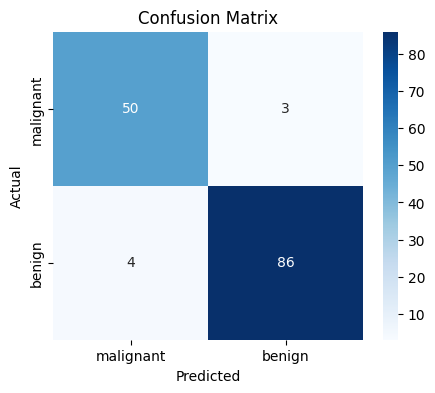

In [12]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 7. Feature Importance

Random Forest provides **global feature importance**.
This tells us which features were most useful overall.


In [13]:
#Feature Importance
importances = pd.Series(
    rf_baseline.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

,0
worst concave points,0.219597
mean concave points,0.098235
mean perimeter,0.090414
worst area,0.090201
worst radius,0.085263
mean radius,0.076653
area error,0.059317
radius error,0.051290
worst compactness,0.044146
worst texture,0.030739


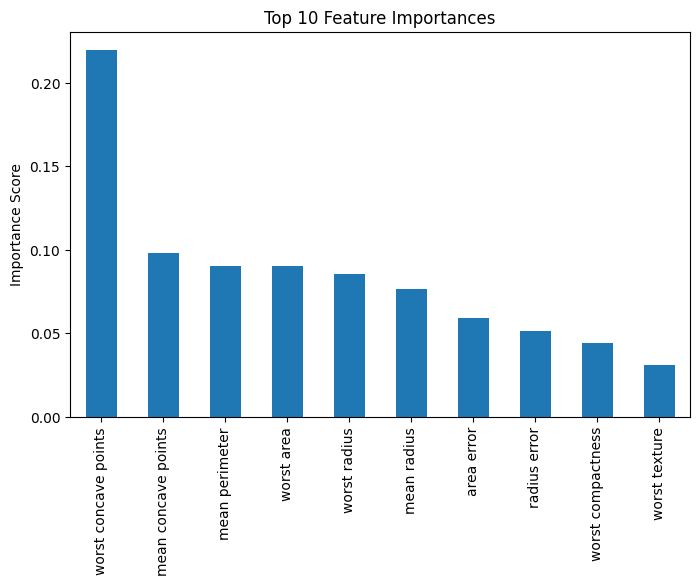

In [14]:
#Visualisation
plt.figure(figsize=(8,5))
importances.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()


Important note:
Feature importance explains the model globally, not individual predictions.



## 8. Why Hyperparameter Tuning Matters

Problems with default settings:
- Trees may be too deep
- Model may overfit
- Training may be unnecessarily slow

We tune **structure**, not vanity metrics.



## 9. Key Hyperparameters

- n_estimators: number of trees
- max_depth: tree depth
- min_samples_split: minimum samples to split
- max_features: features per split


In [15]:
#Key Hyperparameters
param_grid={
    "n_estimators": [100,150,175,200],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2,3,5],
    "max_features": ["sqrt", "log2"]
}


## 10. GridSearchCV for Tuning


In [16]:
#GridSearchCV for Tuning
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 175, 200]},
             scoring='f1')

In [18]:
#Showing outputs
print("Best parameters found:")
print(grid_rf.best_params_)

Best parameters found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}



## 11. Evaluating the Tuned Model


In [17]:
#Evaluating the Tuned Model
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143




## 12. Final Takeaways

- Random Forest is strong out of the box
- Evaluation must go beyond accuracy
- Feature importance provides insight, not full explanation
- Hyperparameter tuning improves robustness, not miracles
